In [1]:
%matplotlib inline


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load (Remember to change these)
city_data_to_load = "../Homework_5/city_data.csv"
ride_data_to_load = "../Homework_5/ride_data.csv"


# Reading the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)


# Combining the data into a single dataset
combined_df = city_data.merge(ride_data, on="city", how="left")


# Displaying the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [2]:
# Grouping the combined dataframe by city
city_grouped = combined_df.groupby("city")


# Finding the average fare of the grouped data
avg_fare = city_grouped.mean()["fare"]


# Finding the total number of rides using the unique ride id numbers
ride_count = city_grouped["ride_id"].count()


# Finding the total number of drivers per city
driver_count = city_grouped.mean()["driver_count"]


# Setting the index on city type
city_type = city_data.set_index("city")["type"]


# Creating dataframe
city_data = pd.DataFrame({"Number of Rides": ride_count,
                        "Average Fare": avg_fare,
                        "Number of Drivers": driver_count,
                        "Type of City": city_type})
city_data.head()

,Number of Rides,Average Fare,Number of Drivers,Type of City
Amandaburgh,18,24.641667,12.0,Urban
Barajasview,22,25.332273,26.0,Urban
Barronchester,16,36.422500,11.0,Suburban
Bethanyland,18,32.956111,22.0,Suburban
Bradshawfurt,10,40.064000,7.0,Rural


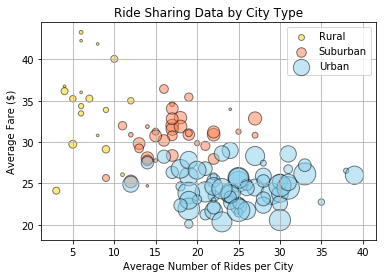

In [3]:
# Obtaining the x and y coordinates for each of the three city types
rural = city_data[city_data["Type of City"] == "Rural"]
suburban = city_data[city_data["Type of City"] == "Suburban"]
urban = city_data[city_data["Type of City"] == "Urban"]


# Building the scatter plots for each city types
plt.scatter(rural["Number of Rides"], rural["Average Fare"], s = rural["Number of Drivers"]*7, color = "gold",
            edgecolor = "black", label = "Rural", alpha = .50)
plt.scatter(suburban["Number of Rides"], suburban["Average Fare"], s = suburban["Number of Drivers"]*7, color = "coral",
            edgecolor = "black", label = "Suburban", alpha = .50)
plt.scatter(urban["Number of Rides"], urban["Average Fare"], s = urban["Number of Drivers"]*7, color = "skyblue",
            edgecolor = "black", label = "Urban", alpha = .50)

plt.legend()
plt.xlabel("Average Number of Rides per City")
plt.ylabel("Average Fare ($)")
plt.title("Ride Sharing Data by City Type")
plt.grid()
plt.show()

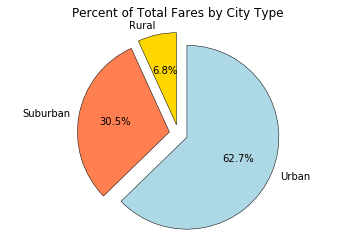

In [4]:
# Calculating Type Percents
by_type_fare = combined_df.groupby("type")
fare_sum = by_type_fare.sum()["fare"]
    
    
# Building Pie Chart
labels = fare_sum.index
colors = ["gold", "coral", "lightblue"]
explode = [.1 , .1, .1]
plt.pie(fare_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = False, wedgeprops = {"linewidth": .5, "edgecolor": "black"})

plt.title("Percent of Total Fares by City Type")
plt.axis("equal")
plt.show()

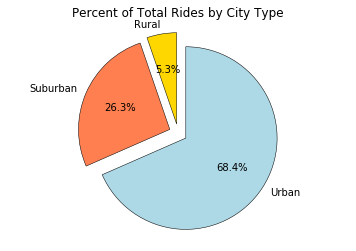

In [5]:
# Calculating Ride Percents
by_type_rides = city_data.groupby("Type of City")
rides_sum = by_type_rides.sum()["Number of Rides"]
rides_sum


# Building Pie Chart
labels = rides_sum.index
colors = ["gold", "coral", "lightblue"]
explode = [.1 , .1, .1]
plt.pie(rides_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = False, wedgeprops = {"linewidth": .5, "edgecolor": "black"})

plt.title("Percent of Total Rides by City Type")
plt.axis("equal")
plt.show()

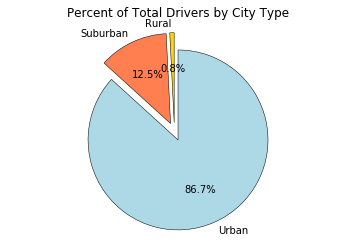

In [6]:
# Calculating Driver Percents
by_type_driver = combined_df.groupby("type")
driver_sum = by_type_driver["driver_count"].sum()
driver_sum
    

# Building Pie Charts
labels = driver_sum.index
colors = ["gold", "coral", "lightblue"]
explode = [.1 , .1, .1]
plt.pie(driver_sum, startangle = 90, colors = colors, explode = explode, labels = labels, autopct = "%1.1f%%",
        shadow = False, wedgeprops = {"linewidth": .5, "edgecolor": "black"})

plt.title("Percent of Total Drivers by City Type")
plt.axis("equal")
plt.show()